In [100]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [101]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')

In [102]:
X = mnist['data']
y = mnist['target']

In [103]:
X_bk = (X > 0).astype(np.int8)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_bk, y, random_state=42, test_size=0.2)

In [105]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred

array(['8', '4', '8', ..., '2', '7', '1'], dtype=object)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.97      0.97      1295
           5       0.98      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.95      0.95      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



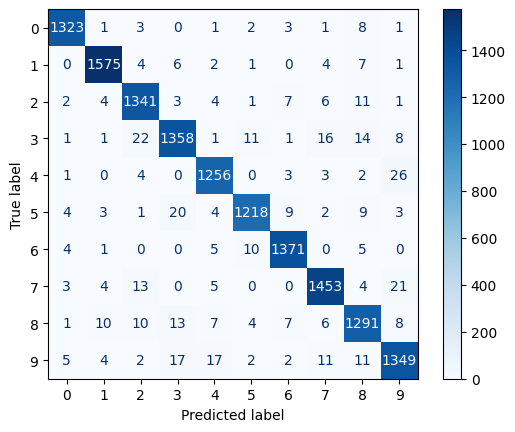

In [107]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')

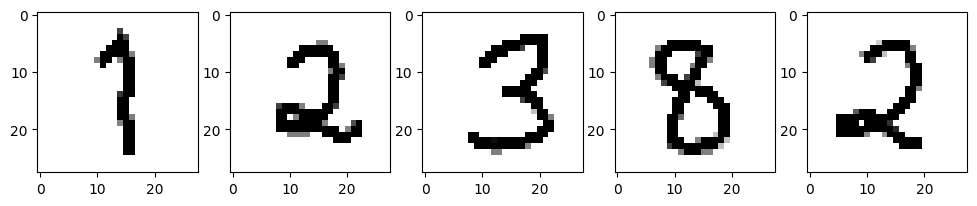

In [124]:
number_imgs = []

number_imgs.append(Image.open('./numbers/img-1.png'))
number_imgs.append(Image.open('./numbers/img-2.png'))
number_imgs.append(Image.open('./numbers/img-3.png'))
number_imgs.append(Image.open('./numbers/img-8.png'))
number_imgs.append(Image.open('./numbers/img-2-1755112482.5909107.png'))

fig, ax = plt.subplots(1, len(number_imgs), figsize=(12,8))

for i, number_img in enumerate(number_imgs):
    ax[i].imshow(number_img, cmap='binary')

plt.show()

In [125]:
numbers = []

for number_img in number_imgs:
    number = np.asarray(number_img)

    for x in number:
        for y in x:
            print('{:3}'.format(y), end='')
        print()
    print()

    number = number.ravel()
    numbers.append(number)

numbers = np.asarray(numbers)
numbers.shape

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0190  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0255190  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0255255255  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0255255255255  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0255255255255255128  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0128255255  0125255255  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0255  0  0  0255255  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0255255  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0255255  0  0  0  0  

(5, 784)

In [126]:
numbers = (pd.DataFrame(numbers) > 0).astype(np.int8)

In [127]:
rf.predict(numbers)

c:\Users\otavi\anaconda3\envs\tf\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['1', '2', '3', '3', '2'], dtype=object)

In [128]:
rf.predict_proba(numbers).tolist()

c:\Users\otavi\anaconda3\envs\tf\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[[0.0, 0.43, 0.11, 0.09, 0.02, 0.03, 0.02, 0.23, 0.02, 0.05],
 [0.04, 0.02, 0.71, 0.03, 0.03, 0.03, 0.01, 0.08, 0.02, 0.03],
 [0.09, 0.04, 0.15, 0.31, 0.03, 0.27, 0.0, 0.06, 0.02, 0.03],
 [0.0, 0.0, 0.01, 0.45, 0.02, 0.33, 0.06, 0.01, 0.12, 0.0],
 [0.05, 0.0, 0.75, 0.06, 0.01, 0.03, 0.03, 0.04, 0.01, 0.02]]

In [129]:
# import joblib, gzip

# joblib.dump(rf, '../webapp/model.joblib', compress=('gzip', 3))